<a href="https://colab.research.google.com/github/kurealnum/dsrp-2025/blob/main/DSRP_Day_5_Lab_Notebook_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Titanic Project**
---

Through the following questions, you will hone and apply your skills to a famous dataset containing information about passengers on the Titanic and whether they survived or not: [Titanic dataset from Kaggle](https://www.kaggle.com/competitions/titanic/overview).


<br>

There are twelve columns in the dataset. The target column is `Survived` which indicates if a passenger survived (1) or not (0). The features initially available are:

* `PassengerId`: Numeric, a unique number for each passenger.
* `Pclass`: Numeric, the ticket class.	1 = 1st, 2 = 2nd, 3 = 3rd.
* `Name`: Categorical, the name of the passenger.
* `Sex`: Categorical, the sex of the passenger.
* `Age`: Numeric, the passenger's age in years.
* `Sibsp`: Numeric, the number of siblings / spouses aboard the Titanic.
* `Parch`: Numeric, the number of parents / children aboard the Titanic.
* `Ticket`: Categorical, ticket number.
* `Fare`: Numeric, passenger fare.
* `Cabin`: Categorical, cabin number.
* `Embarked`: Categorical, port of embarkation.	C = Cherbourg, Q = Queenstown, S = Southampton.
* `Hometown`: Categorical, passenger home town.
* `Destination`: Categorical, ultimate return point.
* `HasCabin`: Categorical, whether the passenger(s) had a cabin or not.

<br>

**Run the cell below to import all necessary libraries and functions.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

url = "https://github.com/the-codingschool/TRAIN-datasets/raw/main/titanic/titanic_cleaned.csv"
df = pd.read_csv(url)

#### **Problem #1**

Print the first 10 rows of the data.

In [2]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Hometown,Destination,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,"Bridgerule, Devon, England","Qu'Appelle Valley, Saskatchewan, Canada",False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,"New York, New York, US","New York, New York, US",True
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,"Jyväskylä, Finland",New York City,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,"Scituate, Massachusetts, US","Scituate, Massachusetts, US",True
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,"Birmingham, West Midlands, England",New York City,False
5,6,0,3,"Moran, Mr. James",male,28,0,0,330877,8.4583,NaN,Q,"Cork, Ireland",New York City,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,"Dorchester, Massachusetts, US","Dorchester, Massachusetts, US",True
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,"Bjuv, Skåne, Sweden","Chicago, Illinois, US",False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,"St. Charles, Illinois, US","St. Charles, Illinois, US",False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,"Zahlé, Lebanon, Ottoman Empire","Cleveland, Ohio, US",False


#### **Problem #2**

Determine how many data points and how many variables are in this dataset using the `.shape` attribute.

In [3]:
df.shape

(891, 15)

#### **Problem #3**

Now, get a general picture of the data's statistics using the `.describe()` method. Then, specifically determine:

* The average age of the passengers.
* The standard deviation (std) of the fare.

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,Sibsp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.345679,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.028212,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The average age of the passengers was 29.35. The standard deviation of the fare was 49.69 dollars.

#### **Problem #4**

Determine how many passengers did or did not survive using the `.value_counts()` method.

In [6]:
df["Survived"].value_counts()

,count
Survived,
0,549
1,342


549 passengers did not survive, and 342 did.

#### **Problem #5**

Visualize the number of passengers who did versus did not survive using a bar graph.

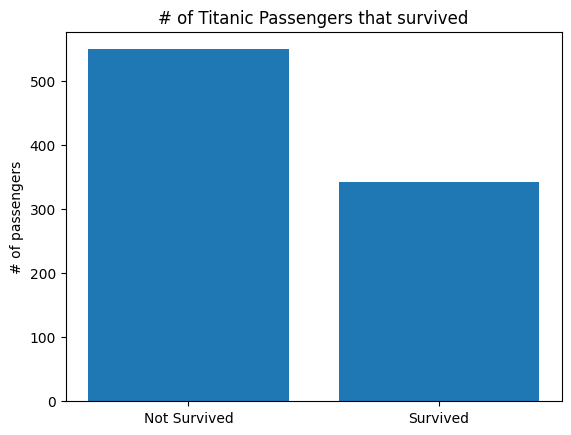

In [11]:
categories = ['Not Survived', 'Survived']
bars = df["Survived"].value_counts()

plt.bar(categories, bars)
plt.ylabel("# of passengers")
plt.title("# of Titanic Passengers that survived")

plt.show()

#### **Problem #6**

Visualize the number of male versus female passengers.

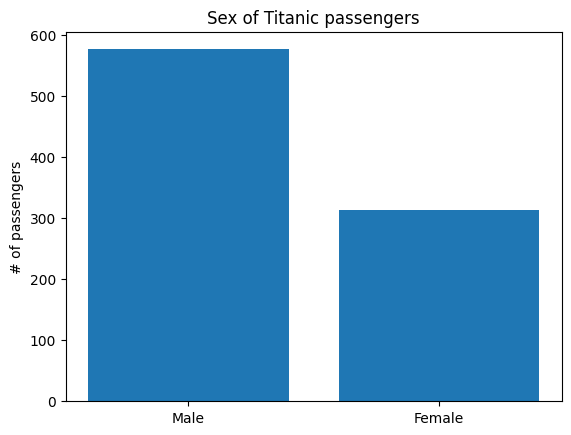

In [12]:
categories = ['Male', 'Female']
bars = df['Sex'].value_counts()

plt.bar(categories, bars)

plt.ylabel("# of passengers")
plt.title("Sex of Titanic passengers")

plt.show()

#### **Problem #7**

Create the following two bar plots:
1. Number of males who did or did not survive.
2. Number of females who did or did not survive.

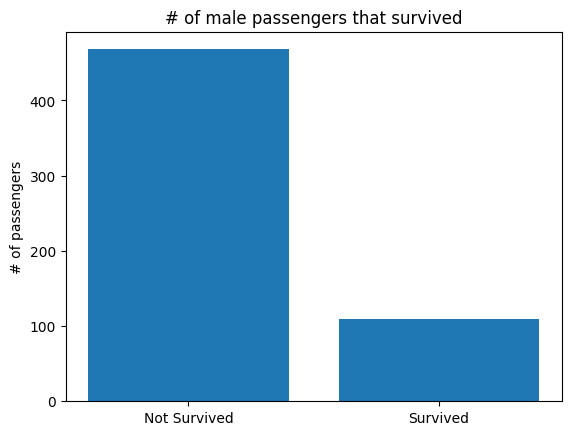

In [46]:
categories = ['Not Survived', 'Survived']
male_data = df['Survived'][df['Sex'] == "male"].value_counts()

plt.bar(categories, male_data)
plt.title("# of male passengers that survived")
plt.ylabel("# of passengers")
plt.show()

# I tried to do this on the same plot
#male_data = df['Sex'][df['Sex'] == "male"]
#male_bars = male_data[""]

# data = df['Sex'].value_counts()
# male_survival = df['Survived'][df['Sex'] == "male"].value_counts()
# female_survival = df['Survived'][df['Sex'] == "female"].value_counts()

# plt.bar(0, male_survival[0], width=0.4, label = ['Not Survived'])
# plt.bar(0.4, male_survival[1], width=0.4, label = ['Survived'])
# plt.bar(1.2, female_survival[0], width=0.4, label = ['Not Survived'])
# plt.bar(1.6, female_survival[1], width=0.4, label = ['Survived'])

# plt.ylabel("# of passengers that survived")
# plt.xticks([0, 0.4, 1.2, 1.6], labels=["Not Survived", "Survived", "Not Survived", "Survived"])
# plt.title("Gender & number of Titanic Passengers that survived")

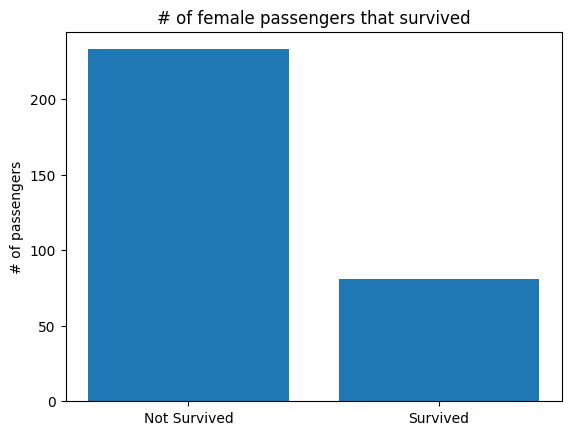

In [54]:

categories = ['Not Survived', 'Survived']
male_data = df['Survived'][df['Sex'] == "female"].value_counts()

plt.bar(categories, male_data)
plt.title("# of female passengers that survived")
plt.ylabel("# of passengers")
plt.show()

#### **Problem #8**

Comparing these values can be difficult since there is a different number of males and females in this dataset as seen in Problem #6. To more properly compare, do the following:
1. Use the `.groupby(...)` method to group the data by sex.
2. Determine the mean value of `Survived` for males and females. **NOTE**: This represents the *fraction* of those who survived since `Survived` is either 0 or 1.
3. Visualize the results with a bar graph.

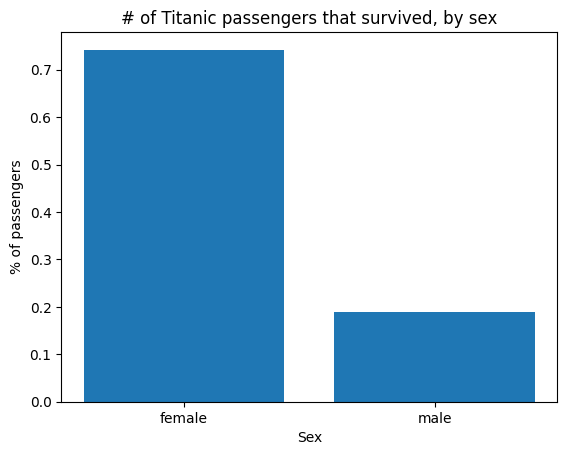

In [50]:
grouped_data = df.groupby('Sex')
surv_frac = grouped_data['Survived'].mean()

x_values = surv_frac.index
plt.bar(x_values, surv_frac)

plt.xlabel("Sex")
plt.ylabel("% of passengers")
plt.title("# of Titanic passengers that survived, by sex")

plt.show()

#### **Problem #9**

Now, perform the same analysis as in Problem #8 using the variable `HasCabin` instead of `Sex`.

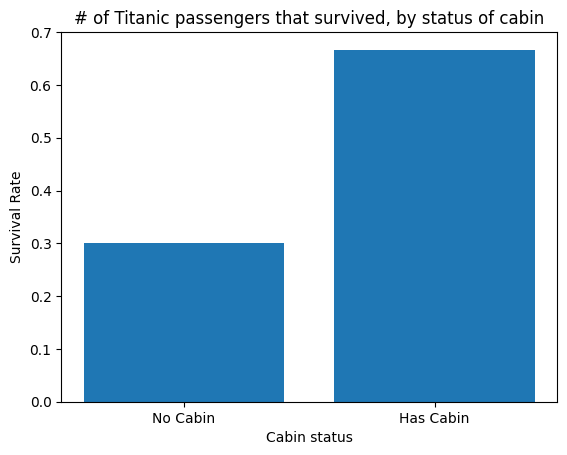

In [67]:
grouped_data = df.groupby('HasCabin')
surv_frac = grouped_data['Survived'].mean()


x_values = surv_frac.index
plt.bar(x_values, surv_frac)

plt.xlabel("Cabin status")
plt.ylabel("Survival Rate")
plt.xticks([0, 1], ["No Cabin", "Has Cabin"])
plt.title("# of Titanic passengers that survived, by status of cabin")

plt.show()

#### **Problem #10**

Performing the same type of analysis, determine which port of embarkation had the least survivors.

<br>

**NOTE**: The description of the dataset at the top of the notebook explains what each possible category (C, Q, S) means.

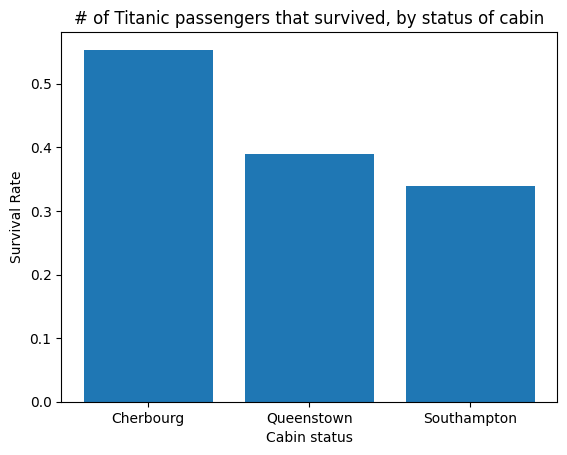

In [72]:
grouped_data = df.groupby('Embarked')
surv_frac = grouped_data['Survived'].mean()
surv_frac.index = ["Cherbourg", "Queenstown", "Southampton"]

x_values = surv_frac.index
plt.bar(x_values, surv_frac)

plt.xlabel("Cabin status")
plt.ylabel("Survival Rate")
plt.title("# of Titanic passengers that survived, by status of cabin")

plt.show()

#### **Problem #11**

Performing the same type of analysis, determine if the passenger class had a noticeable effect on survival.

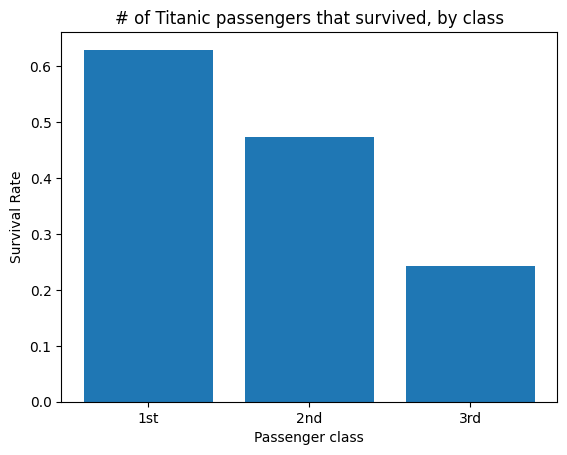

In [73]:
grouped_data = df.groupby('Pclass')
surv_frac = grouped_data['Survived'].mean()
surv_frac.index = ["1st", "2nd", "3rd"]

x_values = surv_frac.index
plt.bar(x_values, surv_frac)

plt.xlabel("Passenger class")
plt.ylabel("Survival Rate")
plt.title("# of Titanic passengers that survived, by class")

plt.show()

#### **Problem #12**

Performing the same type of analysis on the new variable created below, determine if the family size had a noticeable effect on survival.

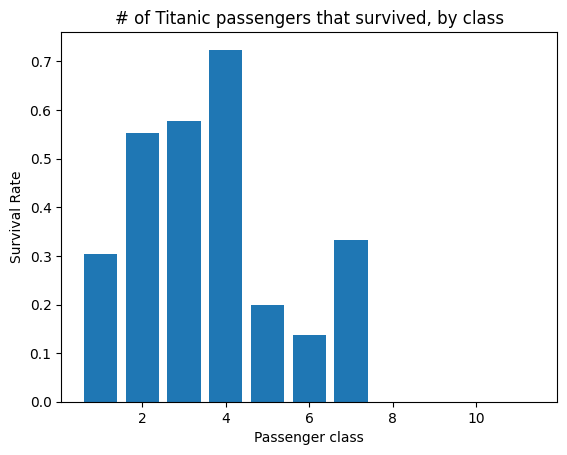

In [76]:
df['FamilySize'] = df['Sibsp'] + df['Parch'] + 1

grouped_data = df.groupby('FamilySize')
surv_frac = grouped_data['Survived'].mean()

x_values = surv_frac.index
plt.bar(x_values, surv_frac)

plt.xlabel("Passenger class")
plt.ylabel("Survival Rate")
plt.title("# of Titanic passengers that survived, by class")

plt.show()

#### **Problem #13**

For sake of comparison, visualize the fraction of survivors versus family size found in Problem #12 using a *line plot*.

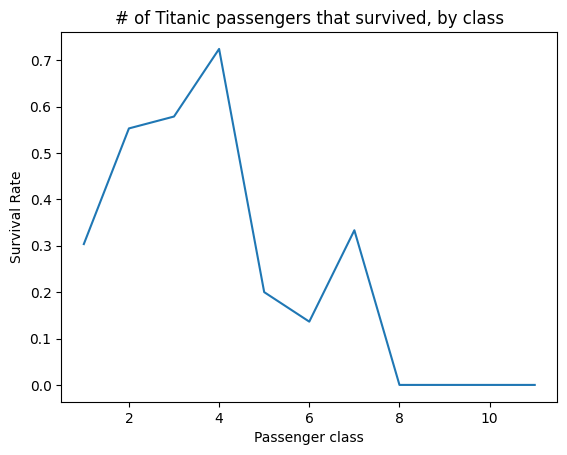

In [77]:
grouped_data = df.groupby('FamilySize')
surv_frac = grouped_data['Survived'].mean()

x_values = surv_frac.index
plt.plot(x_values, surv_frac)

plt.xlabel("Passenger class")
plt.ylabel("Survival Rate")
plt.title("# of Titanic passengers that survived, by class")

plt.show()

#### **Problem #14**

Visualize the fraction of survivors versus age using a scatter plot.

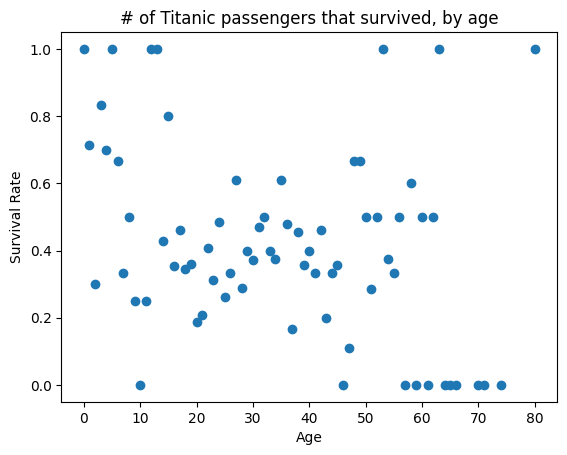

In [97]:
grouped_data = df.groupby('Age')
surv_frac = grouped_data['Survived'].mean()

x_values = surv_frac.index
plt.scatter(x_values, surv_frac)

plt.xlabel("Age")
plt.ylabel("Survival Rate")
plt.title("# of Titanic passengers that survived, by age")

plt.show()

#### **Problem #15**

The results from Problem #14 are not very insightful because we are treating age like a categorical variable when it's realistically a numerical variable that can take on *many* values.

<br>

So, let's *make* a categorical age variable as follows:
1. Run the first cell to create this categorical variable.
2. Create a bar plot showing the survival rate versus age category.

In [104]:
df['Age Category'] = 'unknown'

df['Age Category'][df['Age'] < 13] = 1
df['Age Category'][(df['Age'] >= 13) & (df['Age'] < 18)] = 2
df['Age Category'][(df['Age'] >= 18) & (df['Age'] < 35)] = 3
df['Age Category'][(df['Age'] >= 35) & (df['Age'] < 65)] = 4
df['Age Category'][df['Age'] >= 65] = 5

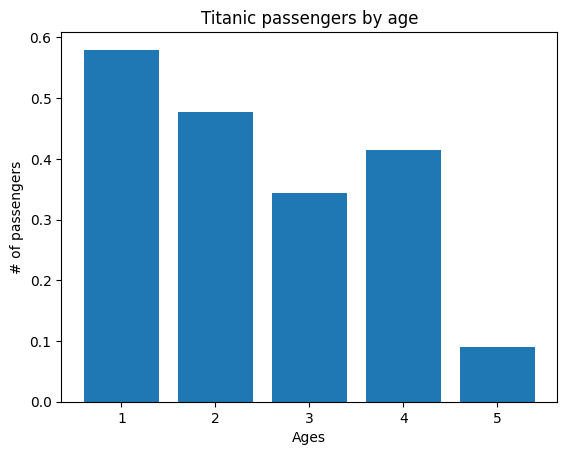

In [107]:
grouped_data = df.groupby('Age Category')
surv_frac = grouped_data['Survived'].mean()

plt.bar(surv_frac.index, surv_frac)
plt.xlabel("Ages")
plt.ylabel("# of passengers")
plt.title("Titanic passengers by age")
plt.show()

#### **Problem #16**

Apply what you've learned about this data to *try* making predictions about who survived or not. Specifically,

1. Run the provided code to predict that only first class passengers survived (based on the fact that they had the highest survival rate). **Make sure you understand this code before moving on.**

2. Using the same approach, make predictions based on whether the passengers were male or female and considering the results you found above.

3. Using the same approach, make predictions based on which port the passengers embarked from and considering the results you found above.

In [108]:
predicted_values = (df['Pclass'] == 1)

correct_predictions = (df['Survived'] == predicted_values)

correct_predictions.value_counts()

,count
True,605
False,286


In [111]:
# For male
predicted_values = (df['Sex'] == "male")

correct_predictions = (df['Survived'] == predicted_values)

correct_predictions.value_counts()

# For female
predicted_values = (df['Sex'] == "female")

correct_predictions = (df['Survived'] == predicted_values)

correct_predictions.value_counts()

,count
True,701
False,190


In [113]:
# Could change value for C, Q, or S
predicted_values = (df['Embarked'] == "Q")

correct_predictions = (df['Survived'] == predicted_values)

correct_predictions.value_counts()

,count
True,532
False,359


#### **Reflection Questions**

If you wish to take your analysis further, consider reflecting on the following questions related to this project and in general:

1. How does each of the following variables relate to survival rates and why might this be?
> * Passenger class: `Pclass`
> * Sex: `Sex`
> * Embarkation port: `Embarked`
> * Age: `Age` and `Age Category`
> * Family Size: `Family Size`

1. How effective were each of the three variables used for prediction in Problem #16? What are the potential values and drawbacks of using this prediction approach generally?

1. What ethical considerations should be taken into account when analyzing sensitive data, such as information about individuals who were in a disaster such as this?